<center>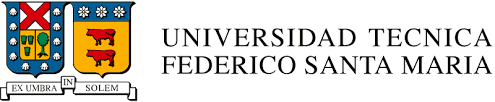</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477/577 Redes Neuronales Artificiales - 2022-2 </h1>

<H3 align='center'> Tarea 2: Grape disease detection  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Carga de datos y preprocesamientos
* Convoluciones y parámetros
* Profundidad
* Image Data Augmentation
* Bloque Residual
* Bloque Inception
* Transfer Learning


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*).
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<maryon.morales@sansano.usm.cl>, <sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-395/477/577-2022-2 Tarea 2]. Invitar como colaborador a los usuarios de github "ssanchezl" y "maryonmorales" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 11 de Noviembre, en horario de clases.
* Fecha de entrega: 12 de Noviembre. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.

<hr style="height:2px;border:none"/>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, **solo son guias** y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier análisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si, sino que la argumentación detrás de la elección será lo más ponderado.
Si algún modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_ o _Amazon Web Service_, donde tienen máquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_ de cada proveedor de servicios.

## 1 - Redes Convolucionales para la detección de enfermedades en la uva.

### Información y anexos

En esta oportunidad se trabajará con un conjunto de imágenes de hojas de las plantas de uva y la tarea será identificar cuál de las 3 enfermedades esta presente en la plante o si esta sana, a partir de las imágenes entregadas. A continuación se presentan 4 sitios en para encontrar más información acerca de las enfermedades de las uvas, de las cuales se trabajará con las últimas 3 listadas:

- [Diseases of Grape (Vitis spp.)](https://web.archive.org/web/20080223134516/http://www.apsnet.org/online/common/names/grape.asp)

- [Black rot](http://ipm.illinois.edu/diseases/series700/rpd703/)

- [Black Measles](https://ieeexplore.ieee.org/document/9397205)

- [Isariopsis leaf spot](http://horticulturejournal.usamv.ro/pdf/2017/Art33.pdf)



## Python libraries

In [ ]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import filecmp as fcmp
import os
import scipy as sp
from PIL import Image
import pandas as pd


import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Input, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import gradient_descent_v2
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import concatenate
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.callbacks import History, EarlyStopping


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

## 1.a Carga de datos y visualizaciones

Establezca la ubicación de los datos.

Descomprima los datos.

### Cargar datos

In [ ]:
from google.colab import files
files.upload()

Saving Grape.zip to Grape.zip


In [ ]:
!unzip /content/Grape.zip -d /content/Grape

Archive:  /content/Grape.zip
replace /content/Grape/Grape___Esca_(Black_Measles)/0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Grape/Grape___Esca_(Black_Measles)/0075b632-2e34-4e4f-9697-fe2b332b7ef8___FAM_B.Msls 4399.JPG  
  inflating: /content/Grape/Grape___Esca_(Black_Measles)/00b65fe8-cee1-4b68-8ef4-1211814f2845___FAM_B.Msls 3990.JPG  
  inflating: /content/Grape/Grape___Esca_(Black_Measles)/00c247e8-48d2-4a56-a9f3-4eacfb4d85be___FAM_B.Msls 4197.JPG  
  inflating: /content/Grape/Grape___Esca_(Black_Measles)/01162551-b800-4df8-ac46-64d17d6ac5bf___FAM_B.Msls 1153.JPG  
  inflating: /content/Grape/Grape___Esca_(Black_Measles)/011bb69d-fb9c-4fb9-b8cc-031e91270ec2___FAM_B.Msls 4288.JPG  
  inflating: /content/Grape/Grape___Esca_(Black_Measles)/011f307f-e06b-4604-9419-d940f7b00290___FAM_B.Msls 1096.JPG  
  inflating: /content/Grape/Grape___Esca_(Black_Measles)/019afd88-6645-44c4-a5d2-bd583b877a50___FAM_B.Msls 1744

Revise las imágenes de cada carpeta y cargue las imágenes en un arreglo $X$, el nombre de la carpeta indica el nombre de cada clase $y$. Cargue los nombres de las clases en un arreglo de tal forma que cada imagen $X$ esté asociada a su respectiva clase $y$.

In [ ]:
X = list()
y = list()

for dirname, _, filenames in os.walk('/content/Grape'): 
    for filename in filenames: 
        image = Image.open(os.path.join(dirname, filename))
        image.thumbnail((80,80), Image.ANTIALIAS)
        X.append(np.array(image, dtype=np.uint8))
        y.append(dirname)   
X = np.asarray(X)
y = np.asarray(y)

Al cargar las imagenes se le cambio la dimensión a 80x80 debido a que no logramos entrenar las redes con las imagenes completas

### ¿Qué porcentaje del total de imagenes tiene cada clase? ¿Están balanceadas las clases?

En primer lugar se cuentan la cantidad de imagenes por cada categoría.

In [ ]:
print('Per class count:')
clases=[]
count=[]
for cls, n in zip(*np.unique(y, return_counts=True)):
    print(f'{cls}: {n} ({(n/float(len(y)))*100:.2f}%)')
    clases.append(cls)
    count.append((n/float(len(y)))*100)

Per class count:
/content/Grape/Grape___Black_rot: 1180 (29.05%)
/content/Grape/Grape___Esca_(Black_Measles): 1383 (34.05%)
/content/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 (26.49%)
/content/Grape/Grape___healthy: 423 (10.41%)


A continuación se muestra un gráfico con la distribución de cada clase existente.

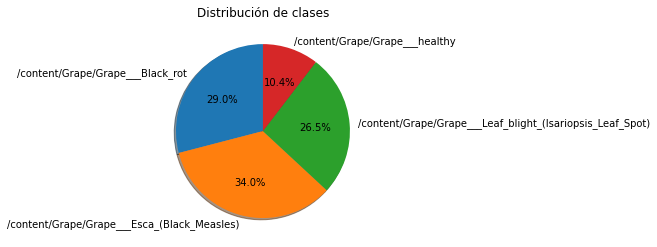

In [ ]:
fig1, ax1 = plt.subplots()
plt.title("Distribución de clases")
ax1.pie(count, labels=clases, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

El gráfico, muestra el porcentaje de imagenes que se encuentran en cada clases. Se puede observar que las clases *Black Rot* y *Blak Measles* comprenden más del 50% de la data. Por otro lado, hay una menor cantidad de hojas saludables, con un 10,4%.

### Visualice algunas imágenes de cada una de las clases junto con sus nombres y revise sus dimensiones y tipo de dato.

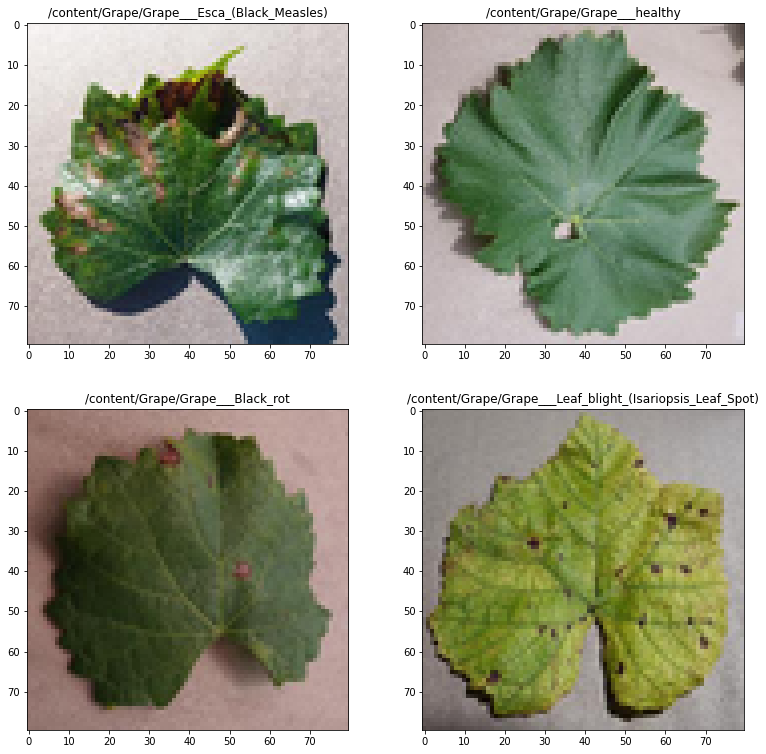

In [ ]:
#plt.rcParams["figure.figsize"]=[8,8]
indices=[0,1383,2459,3639]
tipos = ["Black Rot", "Black Measles", "Healthy", "Isariopsis Leaf Spot"]
plt.rcParams["figure.figsize"]=[13,13]
fig, axarr = plt.subplots(2,2)

axarr[0,0].imshow(Image.fromarray(X[indices[0]]))
axarr[0,0].set_title(y[indices[0]])

axarr[0,1].imshow(Image.fromarray(X[indices[1]]))
axarr[0,1].set_title(y[indices[1]])


axarr[1,0].imshow(Image.fromarray(X[indices[2]]))
axarr[1,0].set_title(y[indices[2]])


axarr[1,1].imshow(Image.fromarray(X[indices[3]]))
axarr[1,1].set_title(y[indices[3]])



plt.show()

In [ ]:
for i in range(4):
    tamaño= X[indices[i]].shape
    t_dato= X[indices[i]].dtype
    print(tipos[i], "\nTamaño imagen:",tamaño, "\nTipo de dato:", t_dato, "\n")

Black Rot 
Tamaño imagen: (80, 80, 3) 
Tipo de dato: uint8 

Black Measles 
Tamaño imagen: (80, 80, 3) 
Tipo de dato: uint8 

Healthy 
Tamaño imagen: (80, 80, 3) 
Tipo de dato: uint8 

Isariopsis Leaf Spot 
Tamaño imagen: (80, 80, 3) 
Tipo de dato: uint8 



Todas las imagenes son de 256 pixeles, con 3 canales RGB y de tipo de datos entero. Pero por temas de recursos computacionales, estas imagenes se reescalaron a 80 pixeles

### Preguntas
1. ¿Qué porcentaje del total de imagenes tiene cada clase? ¿Están balanceadas las clases?
2. Visualice algunas imágenes de cada una de las clases junto con sus nombres y revise sus dimensiones y tipo de dato.

**Respuestas**

1. 
Black_rot: 1180 (29.05%)
Black_Measles: 1383 (34.05%)
Isariopsis_Leaf_Spot: 1076 (26.49%)
healthy: 423 (10.41%)

2. Todas las imagenes son de 256 pixeles, con 3 canales RGB y de tipo de datos entero. Pero por temas de recursos computacionales, estas imagenes se reescalaron a 80 pixeles

## 1.b Preprocesamiento

Transforme $y$ a encoding one hot vector, para esto utilice la librería de SciKit Learn. OneHotEncoder recibe valores categóricos numéricos, por lo que las clases en formato string deben ser transformados vía Label Encoding antes de aplicar One Hot Encoding.

### Label Encoding

En primer lugar se convierte la data categórica en numérica

In [ ]:
# Creating instance of labelencoder
le = LabelEncoder()

# Fit the transformer
le.fit(y)
y_le = le.transform(y)


In [ ]:
tipos=np.unique(y_le, return_counts=True)[0]
cant=np.unique(y_le, return_counts=True)[1]

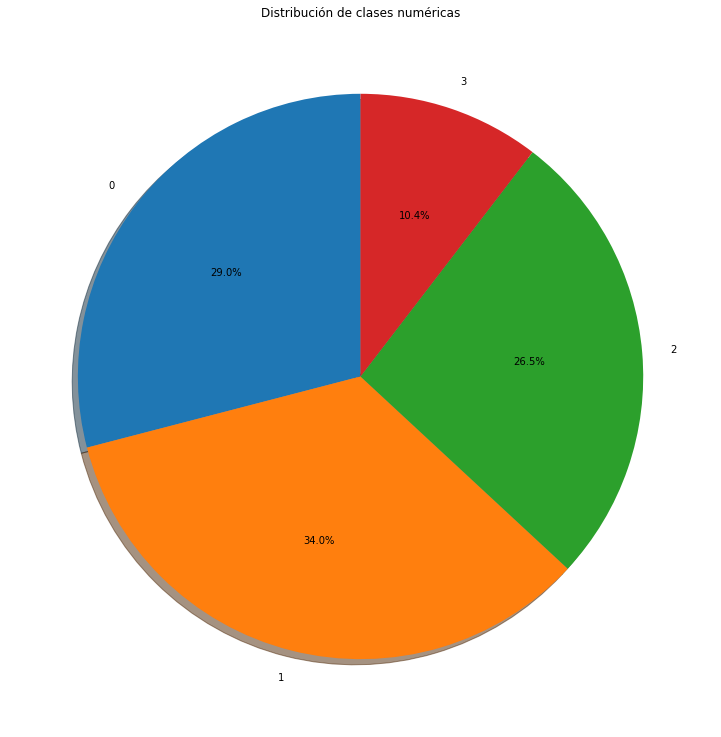

In [ ]:
fig1, ax1 = plt.subplots()
plt.title("Distribución de clases numéricas")
ax1.pie(cant,labels=tipos, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

El gráfico muestra la distribución de imagenes ahora con la data numérica, la cual tiene las categorías 0,1,2 y 3.

### OneHotEncoding

Ahora se utilizará One-Hot Encoding, en el cual cada valor de una categoría se convierte en una nueva columna con 1 o 0's.

In [ ]:
# Creating instance of onehotencoder
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(y_le.reshape(-1, 1))
y_ohe= ohe.transform(y_le.reshape(-1, 1)).toarray()

In [ ]:
y_le

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
y_ohe

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

Se puede notar la diferencia entre ambas matrices, la primera de una dimensión que indica la categoría a la que pertenece la imagen. Mientras que la segunda crea una columna por cada categoría.

### Conjuntos de datos
Separe los datos en conjuntos de entrenamiento, validación y prueba. Elija un porcentaje para separar los conjuntos y justifique.

Se separa la data a través de un *Stratified Sampling*, el cual separa las clases de manera proporcional entre el conjunto de entrenamiento, testeo y validación.
Luego, los porcentajes de separación utilizados son 20% validación, 10% test, 70% train. Esto es debido a que se necesita una mayor cantidad de data para el entrenamiento del modelo

In [ ]:
sf = StratifiedShuffleSplit(n_splits=1,test_size=0.1, train_size=0.9, random_state=42)


for train_index, val_index in sf.split(X, y_ohe):
    X_train, X_test = X[train_index], X[val_index]
    y_train, y_test = y_ohe[train_index], y_ohe[val_index]  

In [ ]:
sf2 = StratifiedShuffleSplit(n_splits=1, test_size=2/9, random_state=42)


for train_index, test_index in sf2.split(X_train, y_train):
    X_train, X_val = X_train[train_index], X_train[test_index]
    y_train, y_val = y_train[train_index], y_train[test_index]  

### Normalización de los datos

Por ahora los valores de los píxeles de las imágenes se encuentran en el rango $[0,255]$. Normalice cada canal RGB por separado y obtenga $\langle(\mu_R,\sigma^2_R), (\mu_G,\sigma^2_G), (\mu_B,\sigma^2_B)\rangle_\text{Train Set}$ y luego use estos parámetros para normalizar los 3 conjuntos separados en la preguna anterior.

In [ ]:
# Perform Standarization
def prep_normalize(X_train, X_val, X_test):	
		
		x_means = X_train.mean(axis=(0,1,2), keepdims=True)
		x_std = X_train.std(axis=(0,1,2), keepdims=True)
		
		X_train	= ((X_train - x_means) / x_std).astype(np.float32)
		X_val   = ((X_val - x_means) / x_std).astype(np.float32)
		X_test  = ((X_test - x_means) / x_std).astype(np.float32)

		# Standarize each channel separately.
		return X_train, X_val, X_test

In [ ]:
X_train, X_val, X_test = prep_normalize(X_train, X_val, X_test)

## 1.c Primera Red Convolucional

Entrenaremos una primera red convolucional sobre los datos, con la mayoría de los parámetros por defecto. Cree primero una red con la siguiente la estructura $C \times P \times C \times P \times D\times D$, donde $C$ representa una capa convolucional, $P$ una capa Max Pooling y $D$ una capa densa. Note que antes de la capa densa debe agregar una capa Flatten que transforma los filtros a vectores que luego pueden ser utilizados por la capa densa.

Para los parámetros de las capas, fijaremos ambas capas convolucionales con 128 filtros de $3 \times 3$, stride por default de $1 \times 1$, y padding "same", es decir, agregaremos $0$ a los bordes de la imágen de tal manera que se preserve la dimension de la imágen al atravesar la capa, las capas de pooling tendrán tamaño y stride $2\times 2$, como muentra el código. 

Para los siguientes modelos se declaran los siguientes valores de cantidad de epochs y batch size

In [ ]:
e=15
bs=128

In [ ]:
def baseline_model(inputs,num_classes):    
    x = inputs
    # create model    
    conv1  = Conv2D(filters = 128,
                    kernel_size = (3,3),
                    strides=(1, 1),
                    padding = 'same',
                    activation = 'relu',
                    data_format="channels_last")(x)

    pool1  = MaxPooling2D(pool_size = (2,2))(conv1)

    conv2  = Conv2D(filters = 128,
                    kernel_size = (3,3),
                    strides=(1, 1),
                    padding = 'same',
                    activation = 'relu')(pool1)

    pool2  = MaxPooling2D(pool_size = (2,2))(conv2)    

    dense1 = Dense(units=32, activation='relu')(Flatten()(pool2))    

    dense2 = Dense(units=num_classes, activation='softmax')(dense1)

    model  = Model(inputs = inputs, outputs = dense2)    
    
    return model

In [ ]:
inputs = Input(shape=X_train.shape[1:])
num_classes = 4

# build the model
model = baseline_model(inputs,num_classes)

Compile la red definida en el item anterior.

Entrene la red hasta observar convergencia recuperando su history. Grafique como varía el accuracy en entrenamiento y validación a lo largo del aprendizaje. Adicionalmente obtenga el accuracy para todo el conjunto de test.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=e, batch_size=bs) #Epcoh y batch size
historia_o=list()
historia_o.append(history)

Epoch 1/15
23/23 [==============================] - 2s 84ms/step - loss: 1.0631 - accuracy: 0.5204 - val_loss: 0.7247 - val_accuracy: 0.7269
Epoch 2/15
23/23 [==============================] - 2s 74ms/step - loss: 0.4982 - accuracy: 0.8054 - val_loss: 0.4235 - val_accuracy: 0.8426
Epoch 3/15
23/23 [==============================] - 2s 75ms/step - loss: 0.3079 - accuracy: 0.8860 - val_loss: 0.3116 - val_accuracy: 0.8770
Epoch 4/15
23/23 [==============================] - 2s 75ms/step - loss: 0.2226 - accuracy: 0.9075 - val_loss: 0.2374 - val_accuracy: 0.9151
Epoch 5/15
23/23 [==============================] - 2s 75ms/step - loss: 0.1606 - accuracy: 0.9405 - val_loss: 0.2367 - val_accuracy: 0.9151
Epoch 6/15
23/23 [==============================] - 2s 75ms/step - loss: 0.1303 - accuracy: 0.9560 - val_loss: 0.2364 - val_accuracy: 0.9225
Epoch 7/15
23/23 [==============================] - 2s 75ms/step - loss: 0.1301 - accuracy: 0.9567 - val_loss: 0.2696 - val_accuracy: 0.9053
Epoch 8/15
23

### Summary
Utilice el método `.summary` del modelo para ver la cantidad de parámetros y las dimensiones de los outputs de cada capa. Justifique el número de parámetros y el Output Shape de cada capa en función de la estructura de la red y lo aprendido en clase.

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 80, 80, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0   

**Parámetros:** Se pueden observar los parámetros del modelo aplicado, lo cual se explica por los siguiente:

1. Input Layer: no tiene parámetros, pues proviene de los inputs de la imagen.
2. Capa convolucional: Se obtienen a través de la multiplicación de los filtros de la capa anterior (d), el tamaño de la matriz mxn, filtros en la capa actual (k) y el bias. Esto resulta en ((m * n * d)+1 )* k

- Conv2D = (3* 3* 3)+1 * 128 = 3584
- Conv2d_1 = ((3 * 3* 128)+1) * 128 = 147584
3. Capa Pooling: No tiene parámetros, pues no involucra backpropagation.
4. Capa Flaten: al igual que la capa anterior, esta no tiene parámetros
5. Por último se tienen dos capas densas, una con 32 nodos y la otra con 4. Los parámetros dependerán de la capa anterior que multiplica a cada uno de los nodos + un bias.

- dense: 524288 * 32 +1 * 32 = 16777248
- dense_1 (output): 4 * 32 +1 * 4 = 132

### Gráficos y resultados

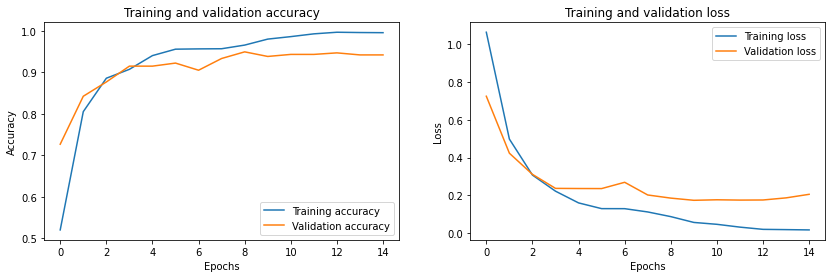

In [ ]:
plt.rcParams["figure.figsize"]=[14,4]
plt.subplot(1, 2, 1)
plt.plot(historia_o[0].history['accuracy'], label="Training accuracy")
plt.plot(historia_o[0].history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historia_o[0].history['loss'], label="Training loss")
plt.plot(historia_o[0].history['val_loss'], label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

El gráfico muestra la variación de los valores de accuracy y loss para el conjunto de entrenamiento y validación. Se puede notar que en el entrenamiento los valores van convergiendo.


A continuación se evalúa el modelo, obteniendo el accuracy total de la data de testeo

In [ ]:
# Test evaluation of the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(f'Loss in test data: {test_loss}\nAccuracy in test data: {test_acc}')

Loss in test data: 0.2439829260110855
Accuracy in test data: 0.9410319328308105


Al probar el accuracy con el dataset de testeo se puede notar que este tiene valores cercanos a el de validación. Siendo ambos a su vez menores que el conjunto de entrenamiento.


### Preguntas 

1. Investigue y explique qué es el stride en la capa convolucional
2. ¿Qué operación efectúa la activación SoftMax y qué representaría en términos del problema el vector de salida de la red?
3.  ¿Por qué preferimos medir crossentropy y no por ejemplo MSE en este problema?
4. ¿Qué valor representa el accuracy?, ¿Le parece buena medida de desempeño para este problema?


**Respuestas:**

1. Stride es un parámetro de los filtros de las redes neuronales que modifica la cantidad de movimiento sobre la imagen, en este caso el stride es de 1x1 lo que indica que el movimiento es de a un cuadrado o pixel a la vez.
2. La función de activación softmax toma un vector en los números reales y los normaliza a una probabilidad de distribución. Generalmente se utiliza como la útlima capa de una red neuronal para normalizar el vector de salida a una probabilidad de distribución sobre las clases a predecir.

3. Cross Entropy es una funcion de perdida utilizada para cuantificar la distancia entre dos distribuciones de probabilidad. Es mejor para clasificación por que la superficie de decisión es más grande en comparasión a una regresión. Por otro lado, cross entropy es la función de costo para salidas de softmax

4. Accuracy es una manera de saber si los algoritmos clasifican puntos de manera correcta, corresponde al número de datos que fueron correctamente predichos, es decir, la cantidad de verdaderos positivos y verdaderos negativos sobre el total de la data. Se podría utilizar "Classification accuracy" para este problema de clasificación.

## 1.d Parámetros de la capa Convolucional

Entrene la misma red (arquitectura $C\times P\times C\times P\times D\times D$) de la pregunta anterior. A continuación en cada punto debe probar las variaciones que se le indican, manteniendo el resto tal como estaba. Por ejemplo si está probando distintos números de filtros, solo se modifica el número de filtros; si está probando distintos kernel size, entonces el número de filtros volverá a fijarse en 128 como estaba en la pregunta anterior.

+ filters (pruebe 2 números, ej: 512, 32),
+ kernel_size (pruebe $1\times 1$, $5\times 5$, $7\times 7$ y $9\times 9$),
+ strides (pruebe (2,2) y (3,3))
+ padding (pruebe valid),
+ dilation_rate (pruebe 1,2,3)
+ MaxPooling y AveragePooling (en ambos casos pruebe stride de (3,3), (5,5))
+ Dense (pruebe con 2 capas densas con 2 números de neuronas distintos en cada capa (sin contar la de salida softmax de 4 clases), por ejemplo: 
$$\cdots \times D(units=64)\times D(units=32)\times D(\text{num_clases}, ``softmax"),$$
$$\cdots \times D(units=128)\times D(units=8)\times D(\text{num_clases}, ``softmax"),$$
$$\cdots \times D(units=256)\times D(\text{num_clases}, ``softmax"),$$
$$\cdots \times D(units=16)\times D(\text{num_clases}, ``softmax").$$

Lea la documentación de esta herramienta e investigue cuales de estos parámetros se pueden combinar para realizar una búsqueda en grilla (¿Qué es una búsqueda en grilla?) y cuales no son compatibles entre ellos para ciertos valores, explique por qué.

Formule la dimensión de salida $(H_{out}, W_{out})$ en función de la dimensión de entrada $(H_{in}, W_{in})$, el tamaño del kernel $k$, el stride $s$, el padding $p$ y el dilation_rate $d$.

 

### Calculos

In [ ]:
def p_model(params):
    x = params['inputs']
    conv1  = Conv2D(filters = params['filters'],
                    kernel_size = params['kernel_size'],
                    strides=params['strides'],
                    padding = params['padding'],
                    dilation_rate =params['dilatation_rate'],
                    activation = 'relu',
                    data_format="channels_last")(x)

    if params['filters'] == "max":
        pool1  = MaxPooling2D( pool_size = params['pool_size'] )(conv1)
    else:
        pool1  = tf.keras.layers.AveragePooling2D( pool_size = params['pool_size'] )(conv1)

    conv2  = Conv2D(filters = params['filters'],
                    kernel_size = params['kernel_size'],
                    strides=params['strides'],
                    dilation_rate =params['dilatation_rate'],
                    padding = params['padding'],
                    activation = 'relu')(pool1)

    if params['filters'] == "max":
        pool2  = MaxPooling2D( pool_size = params['pool_size'] )(conv2)
    else:
        pool2  = tf.keras.layers.AveragePooling2D( pool_size = params['pool_size'] )(conv2)

    dense_I = Dense(units=params['dense'], activation='relu')(Flatten()(pool2))    

    dense_O = Dense(units=params['num_classes'], activation='softmax')(dense_I)

    model  = Model(inputs = params['inputs'], outputs = dense_O)  

    return model

num_classes = 4
historia_param= list()


filtros = [512, 32]
kernel_size = [(1,1), (5,5), (7,7), (9,9)]
strides = [(2,2), (3,3)]
paddind = ["same", "valid"]
dilatation_rate = [1,2,3]
pooling = ["max", "average"]
dense =  [32, 64] 
pool_size = [(3,3), (5,5)]

In [ ]:
for f in filtros:
    params = {
    'filters': f,
    'kernel_size': (3,3),
    'strides': (1,1),
    'padding': 'same',
    'dilatation_rate': 1,
    'pooling' : "max",
    'dense': 32,
    'pool_size': (2,2),
    'num_classes': num_classes,
    'inputs': Input(shape=X_train.shape[1:])
    }

    model_p = p_model( params )
    # build the model
    model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
    # Fit the model
    history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
    historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 9s 397ms/step - loss: 1.9975 - accuracy: 0.4437 - val_loss: 0.7915 - val_accuracy: 0.6531
Epoch 2/15
23/23 [==============================] - 9s 388ms/step - loss: 0.5880 - accuracy: 0.7544 - val_loss: 0.5197 - val_accuracy: 0.7675
Epoch 3/15
23/23 [==============================] - 9s 392ms/step - loss: 0.3684 - accuracy: 0.8564 - val_loss: 0.3640 - val_accuracy: 0.8598
Epoch 4/15
23/23 [==============================] - 9s 397ms/step - loss: 0.2867 - accuracy: 0.8902 - val_loss: 0.3929 - val_accuracy: 0.8512
Epoch 5/15
23/23 [==============================] - 9s 398ms/step - loss: 0.2553 - accuracy: 0.9025 - val_loss: 0.3628 - val_accuracy: 0.8684
Epoch 6/15
23/23 [==============================] - 9s 396ms/step - loss: 0.2155 - accuracy: 0.9187 - val_loss: 0.3512 - val_accuracy: 0.8672
Epoch 7/15
23/23 [==============================] - 9s 396ms/step - loss: 0.1820 - accuracy: 0.9300 - val_loss: 0.3048 - val_accuracy: 0.8893
Epoch 

In [ ]:
for ks in kernel_size:
    params = {
    'filters': 128,
    'kernel_size': ks,
    'strides': (1,1),
    'padding': 'same',
    'dilatation_rate': 1,
    'pooling' : "max",
    'dense': 32,
    'pool_size': (2,2),
    'num_classes': num_classes,
    'inputs': inputs
    }

    model_p = p_model( params )
    # build the model
    model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
    # Fit the model
    history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
    historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 3s 75ms/step - loss: 1.2069 - accuracy: 0.5208 - val_loss: 0.7752 - val_accuracy: 0.6814
Epoch 2/15
23/23 [==============================] - 1s 55ms/step - loss: 0.6347 - accuracy: 0.7206 - val_loss: 0.5934 - val_accuracy: 0.7220
Epoch 3/15
23/23 [==============================] - 1s 54ms/step - loss: 0.4680 - accuracy: 0.7825 - val_loss: 0.4503 - val_accuracy: 0.8069
Epoch 4/15
23/23 [==============================] - 1s 54ms/step - loss: 0.3755 - accuracy: 0.8462 - val_loss: 0.3246 - val_accuracy: 0.9004
Epoch 5/15
23/23 [==============================] - 1s 54ms/step - loss: 0.2387 - accuracy: 0.9314 - val_loss: 0.2656 - val_accuracy: 0.9090
Epoch 6/15
23/23 [==============================] - 1s 55ms/step - loss: 0.1739 - accuracy: 0.9472 - val_loss: 0.2416 - val_accuracy: 0.9139
Epoch 7/15
23/23 [==============================] - 1s 54ms/step - loss: 0.1549 - accuracy: 0.9451 - val_loss: 0.1926 - val_accuracy: 0.9336
Epoch 8/15
23

In [ ]:
for st in strides:
    params = {
    'filters': 128,
    'kernel_size': (3,3),
    'strides': st,
    'padding': 'same',
    'dilatation_rate': 1,
    'pooling' : "max",
    'dense': 32,
    'pool_size': (2,2),
    'num_classes': num_classes,
    'inputs': inputs
    }

    model_p = p_model( params )
    # build the model
    model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
    # Fit the model
    history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
    historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 1s 35ms/step - loss: 0.9146 - accuracy: 0.5799 - val_loss: 0.6809 - val_accuracy: 0.7368
Epoch 2/15
23/23 [==============================] - 1s 23ms/step - loss: 0.5483 - accuracy: 0.7646 - val_loss: 0.5374 - val_accuracy: 0.7614
Epoch 3/15
23/23 [==============================] - 1s 22ms/step - loss: 0.4547 - accuracy: 0.8107 - val_loss: 0.5037 - val_accuracy: 0.8044
Epoch 4/15
23/23 [==============================] - 1s 22ms/step - loss: 0.3806 - accuracy: 0.8529 - val_loss: 0.3772 - val_accuracy: 0.8512
Epoch 5/15
23/23 [==============================] - 1s 23ms/step - loss: 0.2847 - accuracy: 0.8849 - val_loss: 0.3177 - val_accuracy: 0.8844
Epoch 6/15
23/23 [==============================] - 1s 23ms/step - loss: 0.2905 - accuracy: 0.8821 - val_loss: 0.4326 - val_accuracy: 0.8118
Epoch 7/15
23/23 [==============================] - 1s 23ms/step - loss: 0.2638 - accuracy: 0.9050 - val_loss: 0.2785 - val_accuracy: 0.8942
Epoch 8/15
23

In [ ]:
for pad in paddind:
    params = {
    'filters': 128,
    'kernel_size': (3,3),
    'strides': (1,1),
    'padding': pad,
    'dilatation_rate': 1,
    'pooling' : "max",
    'dense': 32,
    'pool_size': (2,2),
    'num_classes': num_classes,
    'inputs': inputs
    }

    model_p = p_model( params )
    # build the model
    model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
    # Fit the model
    history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
    historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 2s 79ms/step - loss: 1.3211 - accuracy: 0.4634 - val_loss: 0.8493 - val_accuracy: 0.6458
Epoch 2/15
23/23 [==============================] - 2s 70ms/step - loss: 0.6338 - accuracy: 0.7449 - val_loss: 0.5042 - val_accuracy: 0.8069
Epoch 3/15
23/23 [==============================] - 2s 71ms/step - loss: 0.3769 - accuracy: 0.8490 - val_loss: 0.4163 - val_accuracy: 0.8450
Epoch 4/15
23/23 [==============================] - 2s 75ms/step - loss: 0.2761 - accuracy: 0.8973 - val_loss: 0.4190 - val_accuracy: 0.8561
Epoch 5/15
23/23 [==============================] - 2s 82ms/step - loss: 0.2254 - accuracy: 0.9198 - val_loss: 0.3390 - val_accuracy: 0.8807
Epoch 6/15
23/23 [==============================] - 2s 75ms/step - loss: 0.1920 - accuracy: 0.9275 - val_loss: 0.2650 - val_accuracy: 0.9041
Epoch 7/15
23/23 [==============================] - 2s 79ms/step - loss: 0.1444 - accuracy: 0.9476 - val_loss: 0.2587 - val_accuracy: 0.9151
Epoch 8/15
23

In [ ]:
for dil_r in dilatation_rate:
    params = {
    'filters': 128,
    'kernel_size': (3,3),
    'strides': (1,1),
    'padding': "same",
    'dilatation_rate': dil_r,
    'pooling' : "max",
    'dense': 32,
    'pool_size': (2,2),
    'num_classes': num_classes,
    'inputs': inputs
    }
    
    model_p = p_model( params )
    # build the model
    model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
    # Fit the model
    history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
    historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 2s 79ms/step - loss: 1.0645 - accuracy: 0.5091 - val_loss: 0.7786 - val_accuracy: 0.6138
Epoch 2/15
23/23 [==============================] - 2s 70ms/step - loss: 0.5399 - accuracy: 0.7632 - val_loss: 0.4665 - val_accuracy: 0.8143
Epoch 3/15
23/23 [==============================] - 2s 76ms/step - loss: 0.3187 - accuracy: 0.8730 - val_loss: 0.2768 - val_accuracy: 0.9065
Epoch 4/15
23/23 [==============================] - 2s 69ms/step - loss: 0.2087 - accuracy: 0.9208 - val_loss: 0.2536 - val_accuracy: 0.9004
Epoch 5/15
23/23 [==============================] - 2s 70ms/step - loss: 0.1666 - accuracy: 0.9398 - val_loss: 0.2774 - val_accuracy: 0.8881
Epoch 6/15
23/23 [==============================] - 2s 70ms/step - loss: 0.1279 - accuracy: 0.9550 - val_loss: 0.2035 - val_accuracy: 0.9287
Epoch 7/15
23/23 [==============================] - 2s 70ms/step - loss: 0.1010 - accuracy: 0.9659 - val_loss: 0.2517 - val_accuracy: 0.9114
Epoch 8/15
23

In [ ]:
for pool in pooling:
  params = {
    'filters': 128,
    'kernel_size': (3,3),
    'strides': (1,1),
    'padding': "same",
    'dilatation_rate': 1,
    'pooling' : pool,
    'dense': 32,
    'pool_size': (2,2),
    'num_classes': num_classes,
    'inputs': inputs
    }
  model_p = p_model( params )
  # build the model
  model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
  # Fit the model
  history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
  historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 2s 80ms/step - loss: 1.2968 - accuracy: 0.4085 - val_loss: 0.9021 - val_accuracy: 0.5904
Epoch 2/15
23/23 [==============================] - 2s 70ms/step - loss: 0.6885 - accuracy: 0.7069 - val_loss: 0.4524 - val_accuracy: 0.8216
Epoch 3/15
23/23 [==============================] - 2s 70ms/step - loss: 0.3617 - accuracy: 0.8607 - val_loss: 0.3344 - val_accuracy: 0.8598
Epoch 4/15
23/23 [==============================] - 2s 70ms/step - loss: 0.2775 - accuracy: 0.8923 - val_loss: 0.2963 - val_accuracy: 0.8893
Epoch 5/15
23/23 [==============================] - 2s 70ms/step - loss: 0.1974 - accuracy: 0.9279 - val_loss: 0.2437 - val_accuracy: 0.9164
Epoch 6/15
23/23 [==============================] - 2s 70ms/step - loss: 0.1677 - accuracy: 0.9395 - val_loss: 0.2609 - val_accuracy: 0.9065
Epoch 7/15
23/23 [==============================] - 2s 69ms/step - loss: 0.1421 - accuracy: 0.9483 - val_loss: 0.3945 - val_accuracy: 0.8770
Epoch 8/15
23

In [ ]:
for de in dense:
    params = {
    'filters': 128,
    'kernel_size': (3,3),
    'strides': (1,1),
    'padding': "same",
    'dilatation_rate': 1,
    'pooling' : "max",
    'dense': de,
    'pool_size': (2,2),
    'num_classes': num_classes,
    'inputs': inputs
    }

    model_p = p_model( params )
    # build the model
    model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
    # Fit the model
    history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
    historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 2s 80ms/step - loss: 0.9396 - accuracy: 0.6151 - val_loss: 0.6008 - val_accuracy: 0.7626
Epoch 2/15
23/23 [==============================] - 2s 71ms/step - loss: 0.4303 - accuracy: 0.8265 - val_loss: 0.4405 - val_accuracy: 0.8118
Epoch 3/15
23/23 [==============================] - 2s 71ms/step - loss: 0.2760 - accuracy: 0.8909 - val_loss: 0.3034 - val_accuracy: 0.8721
Epoch 4/15
23/23 [==============================] - 2s 70ms/step - loss: 0.1840 - accuracy: 0.9307 - val_loss: 0.3023 - val_accuracy: 0.8819
Epoch 5/15
23/23 [==============================] - 2s 71ms/step - loss: 0.1415 - accuracy: 0.9469 - val_loss: 0.2116 - val_accuracy: 0.9250
Epoch 6/15
23/23 [==============================] - 2s 70ms/step - loss: 0.1027 - accuracy: 0.9648 - val_loss: 0.3112 - val_accuracy: 0.8893
Epoch 7/15
23/23 [==============================] - 2s 70ms/step - loss: 0.1000 - accuracy: 0.9669 - val_loss: 0.2779 - val_accuracy: 0.9090
Epoch 8/15
23

In [ ]:
for pool in pool_size:
    params = {
    'filters': 128,
    'kernel_size': (3,3),
    'strides': (1,1),
    'padding': "same",
    'dilatation_rate': 1,
    'pooling' : "max",
    'dense': 32,
    'pool_size': pool,
    'num_classes': num_classes,
    'inputs': inputs
    }

    model_p = p_model( params )
    # build the model
    model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
    # Fit the model
    history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
    historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 2s 66ms/step - loss: 0.8982 - accuracy: 0.5654 - val_loss: 0.6242 - val_accuracy: 0.7405
Epoch 2/15
23/23 [==============================] - 1s 53ms/step - loss: 0.5353 - accuracy: 0.7875 - val_loss: 0.4346 - val_accuracy: 0.8352
Epoch 3/15
23/23 [==============================] - 1s 53ms/step - loss: 0.3552 - accuracy: 0.8586 - val_loss: 0.3337 - val_accuracy: 0.8807
Epoch 4/15
23/23 [==============================] - 1s 53ms/step - loss: 0.2604 - accuracy: 0.9011 - val_loss: 0.3158 - val_accuracy: 0.8782
Epoch 5/15
23/23 [==============================] - 1s 52ms/step - loss: 0.2057 - accuracy: 0.9222 - val_loss: 0.3322 - val_accuracy: 0.8721
Epoch 6/15
23/23 [==============================] - 1s 53ms/step - loss: 0.2055 - accuracy: 0.9212 - val_loss: 0.2732 - val_accuracy: 0.9065
Epoch 7/15
23/23 [==============================] - 1s 53ms/step - loss: 0.1682 - accuracy: 0.9381 - val_loss: 0.2439 - val_accuracy: 0.9151
Epoch 8/15
23

In [ ]:
for pool in pool_size:
    params = {
    'filters': 128,
    'kernel_size': (3,3),
    'strides': (1,1),
    'padding': "same",
    'dilatation_rate': 1,
    'pooling' : "average",
    'dense': 32,
    'pool_size': pool,
    'num_classes': num_classes,
    'inputs': inputs
    }

    model_p = p_model( params )
    # build the model
    model_p.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max", restore_best_weights = True)]
    
    # Fit the model
    history_p = model_p.fit(X_train, y_train, validation_data=(X_val, y_val), 
        epochs=e, batch_size=bs, callbacks = my_callbacks)
    historia_param.append(history_p)

Epoch 1/15
23/23 [==============================] - 2s 61ms/step - loss: 0.9539 - accuracy: 0.5415 - val_loss: 0.7425 - val_accuracy: 0.6704
Epoch 2/15
23/23 [==============================] - 1s 53ms/step - loss: 0.5927 - accuracy: 0.7586 - val_loss: 0.5979 - val_accuracy: 0.7688
Epoch 3/15
23/23 [==============================] - 1s 60ms/step - loss: 0.3630 - accuracy: 0.8564 - val_loss: 0.3120 - val_accuracy: 0.8782
Epoch 4/15
23/23 [==============================] - 1s 53ms/step - loss: 0.3289 - accuracy: 0.8723 - val_loss: 0.3096 - val_accuracy: 0.8918
Epoch 5/15
23/23 [==============================] - 1s 53ms/step - loss: 0.2511 - accuracy: 0.9029 - val_loss: 0.2555 - val_accuracy: 0.9102
Epoch 6/15
23/23 [==============================] - 1s 60ms/step - loss: 0.2385 - accuracy: 0.9029 - val_loss: 0.2700 - val_accuracy: 0.8991
Epoch 7/15
23/23 [==============================] - 1s 53ms/step - loss: 0.1774 - accuracy: 0.9405 - val_loss: 0.3147 - val_accuracy: 0.8856
Epoch 8/15
23

### Gráficos

Filtros

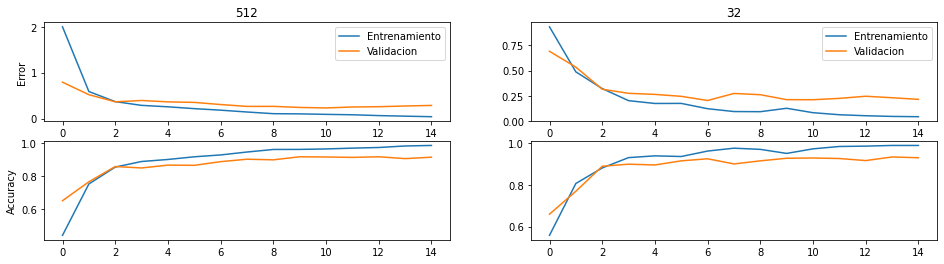

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,4),)

t_f=[512, 32, (1,1), (5,5), (7,7), (9,9), (2,2), (3,3), "same", "valid", 1,2,3, "max", "average", 32, 64,"max (3,3)", "max (5,5)", "average (3,3)", "average (5,5)"]
for i in range(2):
    ax[0,i].plot(range(e), historia_param[i].history['loss'])
    ax[0,i].plot(range(e), historia_param[i].history['val_loss'])
    ax[1,i].plot(range(e), historia_param[i].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_param[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[0,i].set_title(str(t_f[i]))
    ax[0,i].set_xlabel("epoch")
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

El gráfico muestra la variación de los valores de accuracy y error para filtros de 512 y 32. Se puede observar un mejor desempeño en el primer caso

Kernel Size

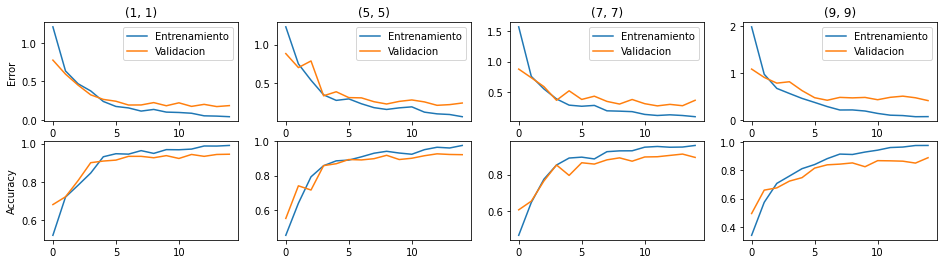

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(16,4),)

j=2
for i in range(4):
    ax[0,i].plot(range(e), historia_param[j].history['loss'])
    ax[0,i].plot(range(e), historia_param[j].history['val_loss'])
    ax[1,i].plot(range(e), historia_param[j].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_param[j].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[0,i].set_title(str(t_f[j]))
    ax[0,i].set_xlabel("epoch")
    j+=1
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')

plt.show()

El gráfico muestra la variación de los valores de accuracy y error para tamaños de kernel de (1,1), (5,5), (7,7), (9,9). Se puede observar un mejor desempeño en el primer caso

Strides

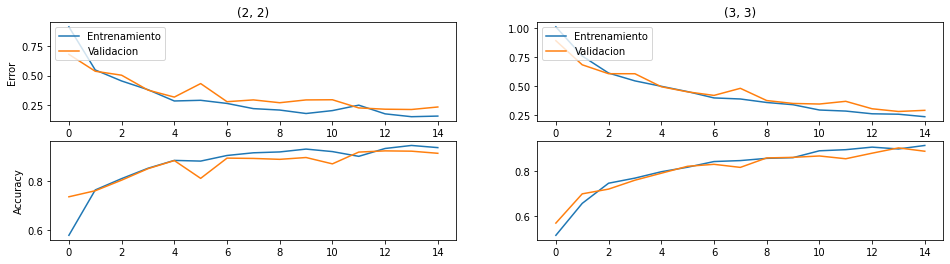

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,4),)

j=6
for i in range(2):
    ax[0,i].plot(range(e), historia_param[j].history['loss'])
    ax[0,i].plot(range(e), historia_param[j].history['val_loss'])
    ax[1,i].plot(range(e), historia_param[j].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_param[j].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[0,i].set_title(str(t_f[j]))
    ax[0,i].set_xlabel("epoch")
    j+=1
  

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')

plt.show()

El gráfico muestra la variación de los valores de accuracy y error para strides de (2,2) y (3,3). Se puede observar un mejor desempeño en el seguno caso

Padding

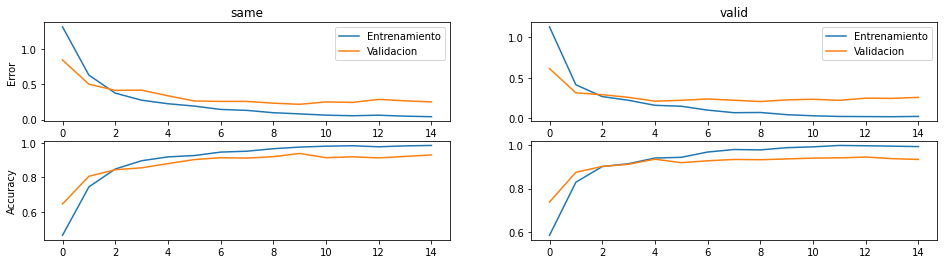

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,4),)

j=8
for i in range(2):
    ax[0,i].plot(range(e), historia_param[j].history['loss'])
    ax[0,i].plot(range(e), historia_param[j].history['val_loss'])
    ax[1,i].plot(range(e), historia_param[j].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_param[j].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[0,i].set_title(str(t_f[j]))
    ax[0,i].set_xlabel("epoch")
    j+=1
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')

plt.show()

El gráfico muestra la variación de los valores de accuracy y error para padding 'same' y 'valid'. Se puede observar un mejor desempeño en el primer caso

Dilatation Rate

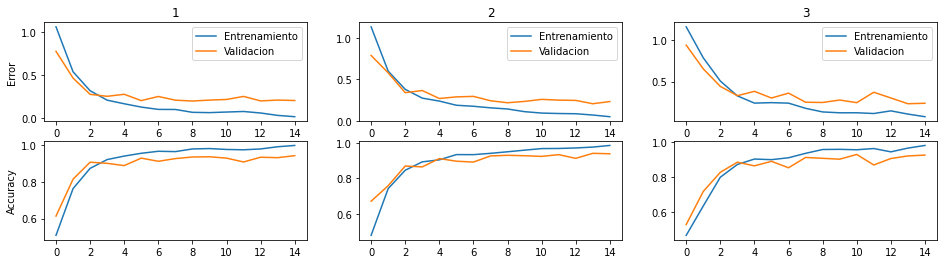

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(16,4),)

j=10
for i in range(3):
    ax[0,i].plot(range(e), historia_param[j].history['loss'])
    ax[0,i].plot(range(e), historia_param[j].history['val_loss'])
    ax[1,i].plot(range(e), historia_param[j].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_param[j].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[0,i].set_title(str(t_f[j]))
    ax[0,i].set_xlabel("epoch")
    j+=1
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')

plt.show()

El gráfico muestra la variación de los valores de accuracy y error para cambios en dilatation rate de 1,2 y 3. Se puede observar un mejor desempeño en el primer caso

Pooling

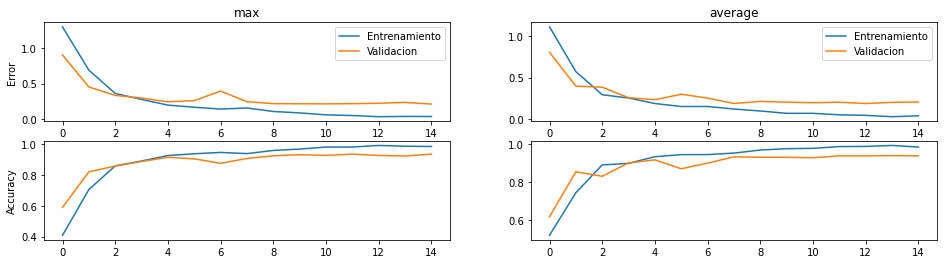

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,4),)

j=13
for i in range(2):
    ax[0,i].plot(range(e), historia_param[j].history['loss'])
    ax[0,i].plot(range(e), historia_param[j].history['val_loss'])
    ax[1,i].plot(range(e), historia_param[j].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_param[j].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[0,i].set_title(str(t_f[j]))
    ax[0,i].set_xlabel("epoch")
    j+=1
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')

plt.show()

El gráfico muestra la variación de los valores de accuracy y error para max y average pooling. Se puede observar un mejor desempeño en el segundo caso.

Dense

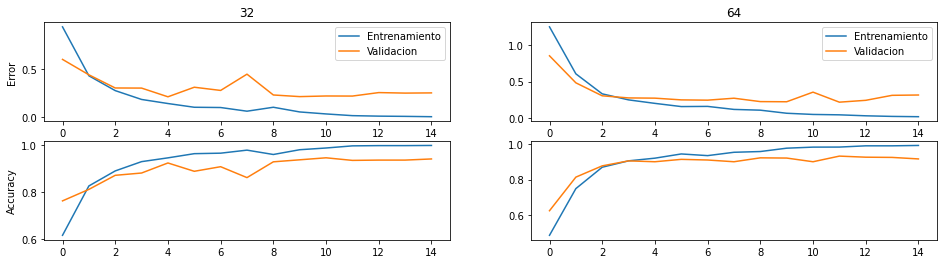

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16,4),)

j=15
for i in range(2):
    ax[0,i].plot(range(e), historia_param[j].history['loss'])
    ax[0,i].plot(range(e), historia_param[j].history['val_loss'])
    ax[1,i].plot(range(e), historia_param[j].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_param[j].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[0,i].set_title(str(t_f[j]))
    ax[0,i].set_xlabel("epoch")
    j+=1
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')

plt.show()

El gráfico muestra la variación de los valores de accuracy y error para una cantidad de 32 y 64 neuronas en la capa densa. Se puede observar un mejor desempeño en el segundo caso

Pool Size

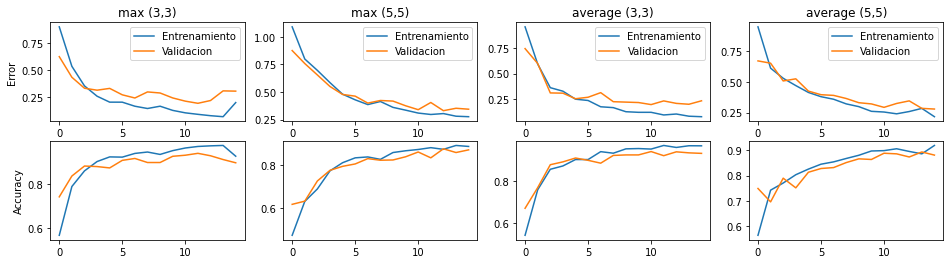

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(16,4),)

j=17
for i in range(4):
    ax[0,i].plot(range(e), historia_param[j].history['loss'])
    ax[0,i].plot(range(e), historia_param[j].history['val_loss'])
    ax[1,i].plot(range(e), historia_param[j].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_param[j].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[0,i].set_title(str(t_f[j]))
    ax[0,i].set_xlabel("epoch")
    j+=1
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')

plt.show()

El gráfico muestra la variación de los valores de accuracy y error para average y max pooling, probando tamaños de (3,3) y (5,5). Se puede observar un mejor desempeño con average pooling, en particular con un tamaño de (3,3)

### Preguntas

1. ¿Qué es una búsqueda en grilla?
2. Investigue cuales de estos parámetros se pueden combinar para realizar una búsqueda en grilla y cuales no son compatibles entre ellos para ciertos valores, explique por qué.

**Respuesta**
1. Búsqueda en grilla es un proceso que busca de forma exhaustiva a través de un conjunto de parámetros específicados. 
2. Al igual que en los calculos anteriores, se pueden definir valores de parámetros para las capas convolucionales y de padding, es decir, filtros, tamaños de kernel, strides, padding, dilatation rate y el cantidad de neuronas en capas densas. Sin embargo el realizar MaxPooling o AveragePooling se tuvo que agregar de forma manual modificando el modelo

## 1.e Bloque $C\times C\times P$

Cree y entrene redes utilizando *bloques* $C\times C\times P$ (dos capas convolucionales seguida de una de maxpool) y luego dos capas densas, por ejemplo la estructura de una red de 2 *bloques* sería la siguiente: $\underbrace{C\times C\times P}_{\text{bloque 1}} \times \underbrace{C\times C\times P}_{\text{bloque 2}}\times D \times D$. Puede agregar las capas densas que desee basandose en la experiencia de las preguntas anteriores o lo aprendido en clases (justifique).

La idea es explorar qué ocurre a medida que se modifica la profundidad de la red. Para esto, entrene redes con distintos números de *bloques*. Debe a lo menos entrenar una red por cada número de *bloques*: entre 1 y 5 *bloques*.

Comente sobre los dos casos extremos (1 y 5 *bloques*), ¿le parece que alguno de los dos sea buena aproximación para la clasificación de estas imágenes? Para cada red recupere history y grafique los valores de accuracy en entrenamiento y validación.

Quedan a su discreción los parámetros de cada capa convolucional, sin embargo, para el número de filtros en las capas convolucionales se recomienda disminuir el número de filtros por la mitad en cada *bloque* por ejemplo: $C(filters=128)\times C(filters=128)\times P \times C(filters=64)\times C(filters=64)\times P\times \cdots \times D \times \cdots \times D.$





Con los resultados de la pregunta anterior, se definen los parámetros siguiente modelo.

In [ ]:
def block_model(inputs,num_classes,filters, n_bloques):    
    x = inputs
    # create model    
    for bloque in range(n_bloques):
      x= Conv2D(filters = filters,
                    kernel_size = (1,1),
                    strides=(1, 1),
                    padding = 'same',
                    activation = 'relu',
                    data_format="channels_last")(x)
      x= Conv2D(filters = filters,
                    kernel_size = (1,1),
                    strides=(1, 1),
                    padding = 'same',
                    activation = 'relu',
                    data_format="channels_last")(x)
      x = MaxPooling2D(pool_size = (2,2))(x)

      filters= filters/2

    dense1 = Dense(units=32, activation='relu')(Flatten()(x))    

    dense2 = Dense(units=num_classes, activation='softmax')(dense1)

    model  = Model(inputs = inputs, outputs = dense2)    
    
    return model

In [ ]:
modelo_b=block_model(inputs,num_classes,128,1)
modelo_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]

In [ ]:
modelo_b.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_86 (Conv2D)          (None, 80, 80, 128)       512       
                                                                 
 conv2d_87 (Conv2D)          (None, 80, 80, 128)       16512     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 flatten_31 (Flatten)        (None, 204800)            0         
                                                                 
 dense_62 (Dense)            (None, 32)                6553632   
                                                          

In [ ]:
inputs = Input(shape=X_train.shape[1:])
num_classes = 4
filtros=128
bloques=[1,2,3,4,5]
historias=list()
for bloque in bloques:
  modelo_b=block_model(inputs,num_classes,filtros,bloque)
  modelo_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]
  history_b = modelo_b.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=e, batch_size=bs)
  historias.append(history_b)
   

Epoch 1/15
23/23 [==============================] - 3s 106ms/step - loss: 1.5797 - accuracy: 0.6541 - val_loss: 0.5531 - val_accuracy: 0.8081
Epoch 2/15
23/23 [==============================] - 2s 97ms/step - loss: 0.3031 - accuracy: 0.8863 - val_loss: 0.2511 - val_accuracy: 0.9151
Epoch 3/15
23/23 [==============================] - 2s 97ms/step - loss: 0.1521 - accuracy: 0.9479 - val_loss: 0.1961 - val_accuracy: 0.9299
Epoch 4/15
23/23 [==============================] - 2s 97ms/step - loss: 0.0928 - accuracy: 0.9733 - val_loss: 0.1884 - val_accuracy: 0.9360
Epoch 5/15
23/23 [==============================] - 2s 96ms/step - loss: 0.0522 - accuracy: 0.9887 - val_loss: 0.1800 - val_accuracy: 0.9397
Epoch 6/15
23/23 [==============================] - 2s 97ms/step - loss: 0.0420 - accuracy: 0.9898 - val_loss: 0.1623 - val_accuracy: 0.9410
Epoch 7/15
23/23 [==============================] - 2s 97ms/step - loss: 0.0230 - accuracy: 0.9972 - val_loss: 0.1714 - val_accuracy: 0.9459
Epoch 8/15
2

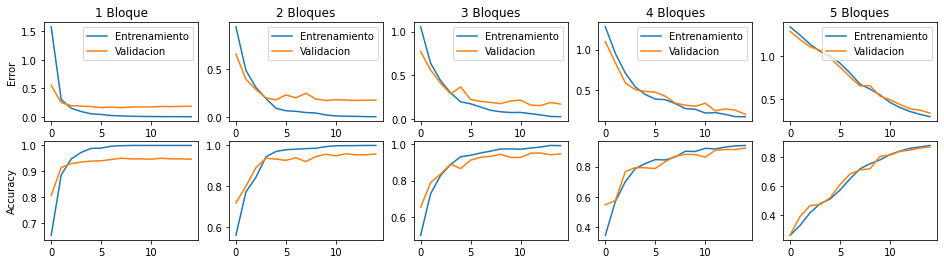

In [ ]:
title = ["1 Bloque", "2 Bloques", "3 Bloques", "4 Bloques", "5 Bloques"]

fig, ax = plt.subplots(2, 5, figsize=(16,4),)

for i in range(5):
    ax[0,i].plot(range(e), historias[i].history['loss'])
    ax[0,i].plot(range(e), historias[i].history['val_loss'])
    ax[1,i].plot(range(e), historias[i].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historias[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[0,i].set_title(str(title[i]))
    ax[0,i].set_xlabel("epoch")
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

Los gráficos muestran la variación de los valores de accuracy y error para distinta cantidad de bloques C×C×P. Se puede observar una mejora en el desempeño entre los bloques 1 y 3, luego este comienza a disminuir, siendo el caso de 5 bloques el de peores valores de accuracy y error.

### Preguntas

 1., ¿le parece que alguno de los dos sea buena aproximación para la clasificación de estas imágenes? 

 Observando los resultados anteriores, el caso de 1 bloque tiene una mejor aproximación para la clasificación de imágenes. Sin embargo, con cantidades intermedias de bloques se lograron mejores resultados

## 1.f Data Augmentation

Otra manera de evitar sobreajuste y mejorar los desempeños de una red convolucional es usar aumentación de datos. La idea detrás de este método es un hecho muy simple: si rotamos ligeramente una foto por ejemplo de un caballo, seguirá siendo de un caballo. Lo mismo si la movemos ligeramente hacia algun lado, hacia arriba, etc.

Keras trae implementado un generador de imágenes aumentadas como se muestra en el *código* a continuación. Explore a lo menos 4 variaciones del generador a continuación, la elección de los parámetros y sus respectivos valores queda en sus manos). Una vez generada la data aumentada, entrene la mejor red que haya obtenido a lo largo de toda la tarea.

Pregunta: ¿Mejora el desempeño de la red utilizando aumentación de datos?



Considerando los resultados de preguntas anteriores, se utiliza un modelo de 3 bloques C×C×P, el cual tuvo mejor rendimiento.

In [ ]:
historia_da=list()

In [ ]:
model=block_model(inputs,num_classes,128,3)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]

Primero se prueba variando la rotación, es decir, se realiza una rotación random en 30 grados.

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range =0.0, # Randomly zoom image 
        width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)
history_da = model.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs) #Epcoh y batch size
historia_da.append(history_da)

Epoch 1/15
89/89 [==============================] - 7s 74ms/step - loss: 0.6653 - accuracy: 0.7171 - val_loss: 0.4159 - val_accuracy: 0.8303
Epoch 2/15
89/89 [==============================] - 6s 72ms/step - loss: 0.2898 - accuracy: 0.8955 - val_loss: 0.3185 - val_accuracy: 0.8831
Epoch 3/15
89/89 [==============================] - 6s 69ms/step - loss: 0.2098 - accuracy: 0.9243 - val_loss: 0.1876 - val_accuracy: 0.9250
Epoch 4/15
89/89 [==============================] - 6s 72ms/step - loss: 0.1724 - accuracy: 0.9370 - val_loss: 0.2123 - val_accuracy: 0.9188
Epoch 5/15
89/89 [==============================] - 6s 70ms/step - loss: 0.1672 - accuracy: 0.9346 - val_loss: 0.1758 - val_accuracy: 0.9336
Epoch 6/15
89/89 [==============================] - 6s 71ms/step - loss: 0.1465 - accuracy: 0.9444 - val_loss: 0.2322 - val_accuracy: 0.9262
Epoch 7/15
89/89 [==============================] - 6s 71ms/step - loss: 0.1451 - accuracy: 0.9444 - val_loss: 0.2424 - val_accuracy: 0.9077
Epoch 8/15
89

Luego, se cambia el valor de "height_shift_range, haciendo un shift vertical de forma aleatoria a las imágenes

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range =0.0, # Randomly zoom image 
        width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)
history_da = model.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs) #Epcoh y batch size
historia_da.append(history_da)

Epoch 1/15
89/89 [==============================] - 6s 70ms/step - loss: 0.3048 - accuracy: 0.8934 - val_loss: 0.2163 - val_accuracy: 0.9225
Epoch 2/15
89/89 [==============================] - 6s 71ms/step - loss: 0.2138 - accuracy: 0.9219 - val_loss: 0.2211 - val_accuracy: 0.9323
Epoch 3/15
89/89 [==============================] - 6s 69ms/step - loss: 0.1532 - accuracy: 0.9451 - val_loss: 0.1620 - val_accuracy: 0.9397
Epoch 4/15
89/89 [==============================] - 6s 69ms/step - loss: 0.1386 - accuracy: 0.9536 - val_loss: 0.1398 - val_accuracy: 0.9422
Epoch 5/15
89/89 [==============================] - 6s 69ms/step - loss: 0.1799 - accuracy: 0.9296 - val_loss: 0.1236 - val_accuracy: 0.9643
Epoch 6/15
89/89 [==============================] - 6s 69ms/step - loss: 0.1124 - accuracy: 0.9613 - val_loss: 0.1139 - val_accuracy: 0.9606
Epoch 7/15
89/89 [==============================] - 6s 70ms/step - loss: 0.1079 - accuracy: 0.9634 - val_loss: 0.1400 - val_accuracy: 0.9557
Epoch 8/15
89

Luego, se cambia el valor de "rotation_range", haciendo una rotación aleatoria en 50 grados

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range =0.0, # Randomly zoom image 
        width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)
history_da = model.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs) #Epcoh y batch size
historia_da.append(history_da)

Epoch 1/15
89/89 [==============================] - 6s 68ms/step - loss: 0.0602 - accuracy: 0.9796 - val_loss: 0.0671 - val_accuracy: 0.9766
Epoch 2/15
89/89 [==============================] - 6s 73ms/step - loss: 0.0488 - accuracy: 0.9814 - val_loss: 0.0660 - val_accuracy: 0.9791
Epoch 3/15
89/89 [==============================] - 6s 67ms/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0474 - val_accuracy: 0.9852
Epoch 4/15
89/89 [==============================] - 6s 67ms/step - loss: 0.0261 - accuracy: 0.9912 - val_loss: 0.0514 - val_accuracy: 0.9828
Epoch 5/15
89/89 [==============================] - 6s 67ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.0702 - val_accuracy: 0.9791
Epoch 6/15
89/89 [==============================] - 6s 67ms/step - loss: 0.0387 - accuracy: 0.9866 - val_loss: 0.0827 - val_accuracy: 0.9803
Epoch 7/15
89/89 [==============================] - 6s 68ms/step - loss: 0.0234 - accuracy: 0.9905 - val_loss: 0.0816 - val_accuracy: 0.9791
Epoch 8/15
89

Por último se realiza un zoom aleatorio a la imagen

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range =0.4, # Randomly zoom image 
        width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)
history_da = model.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs) #Epcoh y batch size
historia_da.append(history_da)

Epoch 1/15
89/89 [==============================] - 6s 72ms/step - loss: 0.0908 - accuracy: 0.9722 - val_loss: 0.1009 - val_accuracy: 0.9729
Epoch 2/15
89/89 [==============================] - 6s 72ms/step - loss: 0.0562 - accuracy: 0.9810 - val_loss: 0.0831 - val_accuracy: 0.9766
Epoch 3/15
89/89 [==============================] - 6s 71ms/step - loss: 0.0404 - accuracy: 0.9887 - val_loss: 0.0686 - val_accuracy: 0.9766
Epoch 4/15
89/89 [==============================] - 7s 76ms/step - loss: 0.0577 - accuracy: 0.9803 - val_loss: 0.1179 - val_accuracy: 0.9668
Epoch 5/15
89/89 [==============================] - 6s 71ms/step - loss: 0.0618 - accuracy: 0.9817 - val_loss: 0.0571 - val_accuracy: 0.9742
Epoch 6/15
89/89 [==============================] - 6s 71ms/step - loss: 0.0438 - accuracy: 0.9880 - val_loss: 0.0680 - val_accuracy: 0.9803
Epoch 7/15
89/89 [==============================] - 8s 90ms/step - loss: 0.0259 - accuracy: 0.9912 - val_loss: 0.0662 - val_accuracy: 0.9803
Epoch 8/15
89

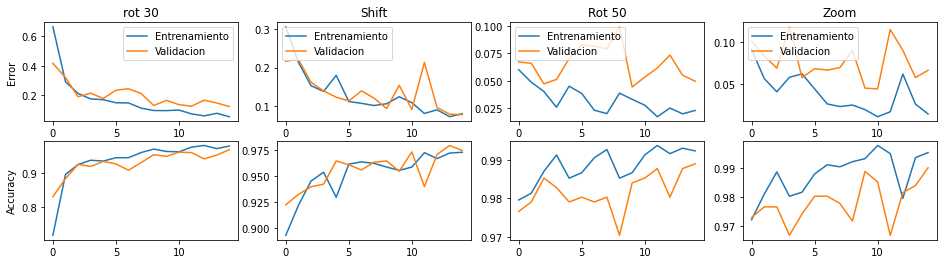

In [ ]:
title = ["rot 30", "Shift", "Rot 50", "Zoom"]

fig, ax = plt.subplots(2, 4, figsize=(16,4),)

for i in range(4):
    ax[0,i].plot(range(e), historia_da[i].history['loss'])
    ax[0,i].plot(range(e), historia_da[i].history['val_loss'])
    ax[1,i].plot(range(e), historia_da[i].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historia_da[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[0,i].set_title(str(title[i]))
    ax[0,i].set_xlabel("epoch")
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

Los gráficos muestran la variación de los valores de accuracy y error para las distintas variaciones de aumentación de datos. Se puede observar mejores resultados para el cuarto caso, es decir, al realizar un zoom aleatorio a la imgagen

### Preguntas

1.¿Mejora el desempeño de la red utilizando aumentación de datos?

Respuesta:

Al comparar con resultados anteriores, el realizad aumentación de datos mejora el desempeño de la red, en los cuatro casos probados.

## 1.g Bloque Residual

A continuación se probaran arquitecturas de red con conexiones residuales, puede usar la data aumentada si le parece indicado.

<center><img src="https://production-media.paperswithcode.com/methods/resnet-e1548261477164.png" width="300"/></center>


En la imagen se muestra el bloque básico de la arquitectura de la primera variación de la Red Residual: ResNet (https://arxiv.org/abs/1512.03385). Investigue las principales motivaciones de cómo implementar este tipo de red, sus ventajas, sus desventajas y luego cree y entrene una red con 1, 2, 3, 4 y 5 bloques residuales. ¿Como deben ser las dimensiones del input $x$ y de $\mathcal{F}(x)$ para poder realizar la operación $\mathcal{F}(x) + x$ entes del *relu* de más abajo?, ¿qué tipo de padding hay que usar en la convolución para mantener las mismas dimensiones de entrada y de salida?

Para los siguientes modelos se utiliza aumentación de datos, debido a la mejora en los resultados que se comprobaron en el punto anterior

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow import Tensor

In [ ]:
def relu_bn(inputs) ->Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x, downsample, filters, kernel_size) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
      x= Conv2D(kernel_size=1,
               strides=2,
               filters=filters,
               padding="same")(x)

    out = Add()([x, y])
    out = relu_bn(out)
    return out

def create_res_net(inputs, num_blocks):
    
    #inputs = Input(shape=(32, 32, 3))
    num_filters = 64
    
    t = BatchNormalization()(inputs)
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)
    
    
    for j in range(num_blocks):
      t = residual_block(t, 1, num_filters,3)
    #num_filters *= 2
        
    
    t = AveragePooling2D(4)(t)
    t = Flatten()(t)
    outputs = Dense(4, activation='softmax')(t)
    
    model = Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
inputs = Input(shape=X_train.shape[1:])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range =0.4, # Randomly zoom image 
        width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

Se muestra continuación el modelo para un bloque residual

In [ ]:
modelo_residual= create_res_net(inputs,1)
modelo_residual.summary()

Model: "model_63"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 batch_normalization_228 (Batch  (None, 80, 80, 3)   12          ['input_9[0][0]']                
 Normalization)                                                                                   
                                                                                                  
 conv2d_404 (Conv2D)            (None, 80, 80, 64)   1792        ['batch_normalization_228[0][0]']
                                                                                                  
 re_lu_197 (ReLU)               (None, 80, 80, 64)   0           ['conv2d_404[0][0]']      

In [ ]:
historias_residual=list()
for i in range(4):
  modelo_residual= create_res_net(inputs,i)
  #modelo_residual.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]
  history_r = modelo_residual.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)
  historias_residual.append(history_r)

Epoch 1/15
89/89 [==============================] - 8s 80ms/step - loss: 1.2978 - accuracy: 0.7132 - val_loss: 0.7267 - val_accuracy: 0.7171
Epoch 2/15
89/89 [==============================] - 6s 67ms/step - loss: 0.6245 - accuracy: 0.8209 - val_loss: 0.5423 - val_accuracy: 0.7970
Epoch 3/15
89/89 [==============================] - 6s 65ms/step - loss: 0.5447 - accuracy: 0.8420 - val_loss: 0.3780 - val_accuracy: 0.8462
Epoch 4/15
89/89 [==============================] - 7s 75ms/step - loss: 0.4647 - accuracy: 0.8645 - val_loss: 0.5185 - val_accuracy: 0.7749
Epoch 5/15
89/89 [==============================] - 6s 66ms/step - loss: 0.3865 - accuracy: 0.8786 - val_loss: 0.4845 - val_accuracy: 0.8229
Epoch 6/15
89/89 [==============================] - 6s 65ms/step - loss: 0.3463 - accuracy: 0.8909 - val_loss: 0.4104 - val_accuracy: 0.8487
Epoch 7/15
89/89 [==============================] - 6s 65ms/step - loss: 0.2686 - accuracy: 0.9145 - val_loss: 0.4559 - val_accuracy: 0.8708
Epoch 8/15
89

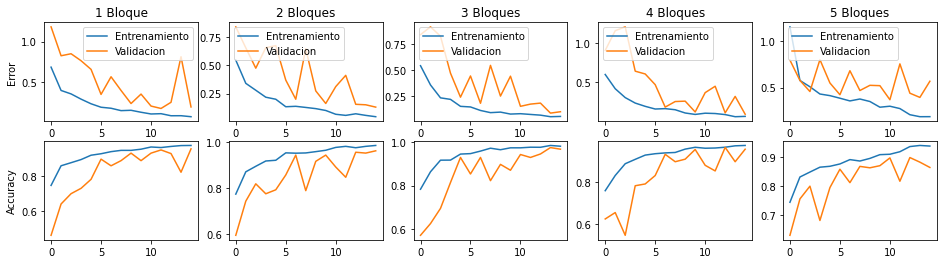

In [ ]:
title = ["1 Bloque", "2 Bloques", "3 Bloques", "4 Bloques", "5 Bloques"]


fig, ax = plt.subplots(2, 5, figsize=(16,4),)


for i in range(4):
    ax[0,i-1].plot(range(e), historias_residual[i].history['loss'])
    ax[0,i-1].plot(range(e), historias_residual[i].history['val_loss'])
    ax[1,i-1].plot(range(e), historias_residual[i].history['accuracy'], label ="Training accuracy" )
    ax[1,i-1].plot(range(e), historias_residual[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i-1].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[0,i-1].set_title(str(title[i-1]))
    ax[0,i-1].set_xlabel("epoch")
  
ax[0,0].legend(['Entrenamiento', 'Validacion'], loc='upper right')

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

Los gráficos muestran la variación de los valores de accuracy y error para las distintas cantidad de bloques residuales que se agregaron al la red. Se puede notar una mejora en el desempeño de la red a medida que se van aumentando la cantidad de bloques, en particular, con 5 bloques se llega a obtener un accuracy de 0.9692 y un error de 0.0986, siendo los mejores a lo largo de la tarea.

### Preguntas

1. ¿Como deben ser las dimensiones del input  x  y de  F(x)  para poder realizar la operación  F(x)+x  entes del relu de más abajo?
2. ¿qué tipo de padding hay que usar en la convolución para mantener las mismas dimensiones de entrada y de salida?

**Respuestas:**

1. La operación F(x) se obtiene a través de la aplicación de una capa convolucional, una relu y otra convolucional, para ello se debe mantener la dimensión, para poder realizar la operación F(x) + x.
2. Se utiliza padding "same" el cual mantiene las dimensiones de la entrada y salida.




## 1.h Bloque Inception

En preguntas anteriores se pidió probar con distintos tamaños de kernel, en este tipo de bloque la idea es usar varios tamaños al mismo tiempo y así extraer características de contextos grandes y pequeños.

Para comenzar es útil preguntarse: ¿Qué pasa si se desea modificar solamente el número de canales?. Existe una forma de mantener las dimensiones de entrada, modificando el número de canales de la salida: La convolución $1 \times 1$.

Imagine que tiene una matriz $M$ de tamaño $6 \times 6$, si realiza una convolución con una matriz $m$ de $1\times 1$ y luego una activación, entonces $M^{6 \times 6} * m^{1\times 1}$ será una multiplicación element-wise entre el valor de $m$ y cada elemento de $M$ resultando luego de la activación otra matriz de $6\times 6$. 

Teniendo en mente lo anterior, suponga ahora que la entrada es un arreglo de tamaño $(6 \times 6 \times 32)$, es decir, tiene 32 canales. Considere que desea aplicar una convolución con $N$ filtros a todos los canales, entonces el tamaño de los filtros debe ser $(1\times 1 \times 32)$, el resultado de la convolución será tendrá un tamaño $(6 \times 6 \times N)$. Por lo tanto es posible aumentar, mantener o disminuir el la cantidad de canales de la salida. La idea de mantener los canales es aplicar una activación no lineal, lo que permite a la red aprender funciónes más complejas.

Otra ventaja de la convolución $(1\times 1)$ es que ayuda a reducir 
el costo computacional entre otras convoluciones, por ejemplo si se aplican 32 filtros de tamaño $(5\times 5 \times 192)$ con padding `same` a una entrada de tamaño $(28 \times 28 \times 192)$, entonces la salida será de tamaño $(28 \times 28 \times 32)$ y el total de multiplicaciones será: $28\times 28 \times 32 \times 5 \times 5 \times 192 = 120\; \text{Millones}$. Por esta razón al aplicar convoluciones con filtros de distintos tamaños conviene reducir el número de operaciones a través de la siguiente idea llamada "cuello de botella":

- A la entrada de $(28 \times 28 \times 192)$ aplique 16 filtros convolucionales de $(1 \times 1 \times 192)$, obteniendo una salida de $(28 \times 28 \times 16)$.

- Luego aplique 32 filtros convolucionales de $(5 \times 5 \times 16)$, obteniendo una salida de $(28 \times 28 \times 32)$.

Para la primera operación se requieren $28 \times 28 \times 16 \times 192 = 2.4\; \text{Millones}$ de multiplicaciones, mientras que en la segunda son $28 \times 28 \times 32 \times 5 \times 5 \times 16 = 10\; \text{Millones}$. Finalmente sumando ambas cantidades se obtiene un total de $12.4\; \text{Millones}$ de multiplicaciones, casi un 10% de lo que se obtiene al realizar la operación directamente!.

Con todo lo anterior en mente se le pide que implemente una red con una red utilizando el bloque presentado en la imagen de abajo. Pruebe con 1,3 y 4 bloques antes de aplicar las capas densas. Note que en la imagen la entrada y la salida conservan la dimensión de $(28 \times 28)$, por lo tanto entre cada bloque *inception* puede ir bajando dicha dimensión, para obtener más información sobre la construcción del bloque puede leer el siguiente documento https://arxiv.org/pdf/1409.4842.pdf.


<center><img src="https://blog.kakaocdn.net/dn/dvyzrN/btqNkQRUokj/DrrKv0t5QJ9CyRI45aosd1/img.jpg" width="300"/><center/>

A continuación se muestra el modelo de la red, debido a que un bloque conserva la dimensión de la entrada, se agregó un pooling al finalizar cada bloque para ir disminuyendo dimensión de salida.

In [ ]:
def bloque(cant_bloques):
  x = inputs
  for i in range(cant_bloques):
    la_1 = Conv2D(96, (1,1), padding='same', activation='relu')(x)
    la_1 = Conv2D(128, (3,3), padding='same', activation='relu')(la_1)
    la_2 = Conv2D(16, (1,1), padding='same', activation='relu')(x)
    la_2 = Conv2D(32, (5,5), padding='same', activation='relu')(la_2)
    la_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    la_3 = Conv2D(32, (1,1), padding='same', activation='relu')(la_3)
    la_4 = Conv2D(64, (1,1), padding='same', activation='relu')(x)
    conc = concatenate([la_1,la_2, la_3,la_4], axis = 3)
    x = MaxPooling2D(pool_size = (2,2))(conc)
  output = Flatten()(x)
  out= Dense(4, activation='softmax')(output)
  return out

In [ ]:
model_inc=Model(inputs= inputs, outputs = bloque(1))
model_inc.summary()

Model: "model_68"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_439 (Conv2D)            (None, 80, 80, 96)   384         ['input_9[0][0]']                
                                                                                                  
 conv2d_441 (Conv2D)            (None, 80, 80, 16)   64          ['input_9[0][0]']                
                                                                                                  
 max_pooling2d_23 (MaxPooling2D  (None, 80, 80, 3)   0           ['input_9[0][0]']                
 )                                                                                         

In [ ]:
inputs = Input(shape=X_train.shape[1:])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range =0.0, # Randomly zoom image 
        width_shift_range=0.0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
historias_inception=list()
bloques = [1,3,4]

for b in bloques:
  model_inc=Model(inputs= inputs, outputs = bloque(b))
  model_inc.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]
  history_inc = model_inc.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)
  historias_inception.append(history_inc)
  inputs = Input(shape=X_train.shape[1:])


Epoch 1/15
89/89 [==============================] - 9s 90ms/step - loss: 2.4150 - accuracy: 0.7231 - val_loss: 0.4482 - val_accuracy: 0.8598
Epoch 2/15
89/89 [==============================] - 7s 77ms/step - loss: 0.3445 - accuracy: 0.8846 - val_loss: 0.4757 - val_accuracy: 0.8475
Epoch 3/15
89/89 [==============================] - 7s 78ms/step - loss: 0.2826 - accuracy: 0.9046 - val_loss: 0.2921 - val_accuracy: 0.9102
Epoch 4/15
89/89 [==============================] - 7s 77ms/step - loss: 0.1778 - accuracy: 0.9360 - val_loss: 0.2877 - val_accuracy: 0.8991
Epoch 5/15
89/89 [==============================] - 7s 77ms/step - loss: 0.2723 - accuracy: 0.9106 - val_loss: 0.6964 - val_accuracy: 0.8155
Epoch 6/15
89/89 [==============================] - 7s 77ms/step - loss: 0.1936 - accuracy: 0.9363 - val_loss: 0.2138 - val_accuracy: 0.9446
Epoch 7/15
89/89 [==============================] - 7s 78ms/step - loss: 0.1274 - accuracy: 0.9550 - val_loss: 0.3328 - val_accuracy: 0.9139
Epoch 8/15
89

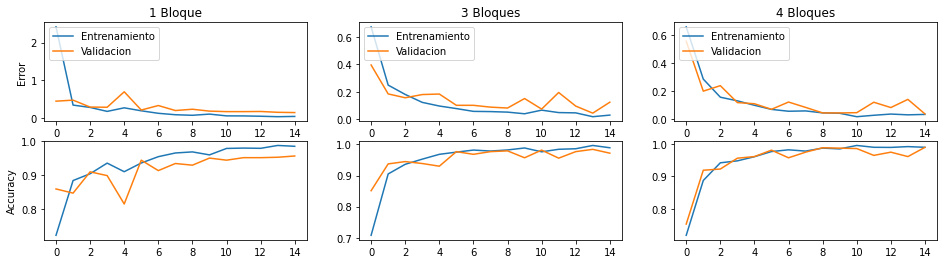

In [ ]:
title = ["1 Bloque", "3 Bloques", "4 Bloques", "4 Bloques", "5 Bloques"]


fig, ax = plt.subplots(2, 3, figsize=(16,4),)


for i in range(3):
    ax[0,i].plot(range(e), historias_inception[i].history['loss'])
    ax[0,i].plot(range(e), historias_inception[i].history['val_loss'])
    ax[1,i].plot(range(e), historias_inception[i].history['accuracy'], label ="Training accuracy" )
    ax[1,i].plot(range(e), historias_inception[i].history['val_accuracy'], label ="Validation accuracy" )
    ax[0,i].legend(['Entrenamiento', 'Validacion'], loc='upper left')
    ax[0,i].set_title(str(title[i]))
    ax[0,i].set_xlabel("epoch")
  

ax[0,0].set_ylabel('Error')
ax[1,0].set_ylabel('Accuracy')
plt.show()

Los gráficos muestran la variación de los valores de accuracy y error para los distintos valores de bloques probados. Se puede ir notando una mejora de desempeño a medida que se van agregando bloques inception. En particular, con 4 bloques se lograron valores de accuracy de 0.9717 y error de 0.0751, los cuales han sido los mejores a lo largo de la tarea.

## 1.i Transfer Learning

A continuación se le pide escoger 1 modelo pre entrenado de entre los presentes en la siguiente lista https://keras.io/api/applications/, puede usar alguno de los vistos a lo largo de la tarea o puede escoger otro que le parezca. En el link anterior y en el siguiente puede encontrar información acerca de los modelos, su implementación y otras consideraciones.

Preguntas: ¿Qué es Transfer Learning?, ¿Cómo se implementa Transfer Learning con un modelo pre entrenado? (explique brevemente)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB6
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0



from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD


In [ ]:
historia_tl=list()

Se utilizaron los siguientes modelos

1. InceptionV3: Con 23.9 M de parámetros, un top-1 Accuracy de 77.9% y un Top-5 accuracy de 93.7%

2. EfficientNetB6: Con 43.3 M de parámetros, un top-1 Accuracy de 84.0% y un Top-5 accuracy de 96.8%

3. EfficientNetV2M: Con 54.4 M de parámetros, un top-1 Accuracy de 85.3% y un Top-5 accuracy de 97.4%

4. EfficientNetV2B0:  Con 7.2 M de parámetros, un top-1 Accuracy de 78.7% y un Top-5 accuracy de 94.3%


### InceptionV3

In [ ]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model_tl = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_tl.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model_tl.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])
my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers

history_tl = model_tl.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)
historia_tl.append(history_tl)

87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/15
89/89 [==============================] - 13s 98ms/step - loss: 1.7587 - val_loss: 0.7075
Epoch 2/15
89/89 [==============================] - 6s 69ms/step - loss: 0.7392 - val_loss: 0.7917
Epoch 3/15
89/89 [==============================] - 6s 72ms/step - loss: 0.6393 - val_loss: 0.5819
Epoch 4/15
89/89 [==============================] - 6s 71ms/step - loss: 0.5982 - val_loss: 0.7637
Epoch 5/15
89/89 [==============================] - 6s 71ms/step - loss: 0.5615 - val_loss: 0.6073
Epoch 6/15
89/89 [==============================] - 6s 71ms/step - loss: 0.5380 - val_loss: 0.5772
Epoch 7/15
89/89 [==============================] - 7s 79ms/step - loss: 0.5190 - val_loss: 0.7109
Epoch 8/15
89/89 [==============================] - 6s 70ms/step - loss: 0.5146 - val_loss: 0.6042
Epoch 9/15
89/89 [==============================] - 6s 70ms/step - loss: 0.4777 - val_loss: 0.5918
Epoch 10/15
89/89 [========================

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


89/89 [==============================] - 6s 71ms/step - loss: 0.3722 - val_loss: 0.7070
Epoch 2/15
89/89 [==============================] - 7s 81ms/step - loss: 0.3864 - val_loss: 0.6894
Epoch 3/15
89/89 [==============================] - 6s 70ms/step - loss: 0.3376 - val_loss: 0.7497
Epoch 4/15
89/89 [==============================] - 6s 71ms/step - loss: 0.3340 - val_loss: 0.7658
Epoch 5/15
89/89 [==============================] - 6s 70ms/step - loss: 0.3457 - val_loss: 0.7810
Epoch 6/15
89/89 [==============================] - 6s 71ms/step - loss: 0.3378 - val_loss: 0.9592
Epoch 7/15
89/89 [==============================] - 6s 71ms/step - loss: 0.3421 - val_loss: 0.7625
Epoch 8/15
89/89 [==============================] - 6s 71ms/step - loss: 0.3085 - val_loss: 0.7221
Epoch 9/15
89/89 [==============================] - 6s 70ms/step - loss: 0.3062 - val_loss: 0.8489
Epoch 10/15
89/89 [==============================] - 6s 70ms/step - loss: 0.3120 - val_loss: 0.7262
Epoch 11/15
89/89 [=

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_493 (Conv2D)            (None, None, None,   864         ['input_15[0][0]']               
                                32)                                                               
                                                                                                  
 batch_normalization_258 (Batch  (None, None, None,   96         ['conv2d_493[0][0]']             
 Normalization)                 32)                                                    

### EfficientNetB6

In [ ]:
# create the base pre-trained model
base_model = EfficientNetB6(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model_tl = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_tl.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model_tl.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])
my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_tl = model_tl.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)
historia_tl.append(history_tl)



165234480/165234480 [==============================] - 3s 0us/step
Epoch 1/15
89/89 [==============================] - 29s 148ms/step - loss: 1.7911 - val_loss: 1.2060
Epoch 2/15
89/89 [==============================] - 8s 89ms/step - loss: 1.1803 - val_loss: 0.9914
Epoch 3/15
89/89 [==============================] - 8s 88ms/step - loss: 1.0856 - val_loss: 0.9776
Epoch 4/15
89/89 [==============================] - 8s 90ms/step - loss: 1.0531 - val_loss: 1.0483
Epoch 5/15
89/89 [==============================] - 8s 89ms/step - loss: 1.0226 - val_loss: 0.9114
Epoch 6/15
89/89 [==============================] - 8s 88ms/step - loss: 0.9937 - val_loss: 0.9000
Epoch 7/15
89/89 [==============================] - 8s 93ms/step - loss: 0.9891 - val_loss: 1.0020
Epoch 8/15
89/89 [==============================] - 8s 94ms/step - loss: 0.9599 - val_loss: 0.8131
Epoch 9/15
89/89 [==============================] - 8s 90ms/step - loss: 0.9573 - val_loss: 0.8896
Epoch 10/15
89/89 [=====================

In [ ]:
base_model.summary()

Model: "efficientnetb6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_16[0][0]']               
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

### EfficientNetV2M

In [ ]:
# create the base pre-trained model
base_model = EfficientNetV2M(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model_tl = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_tl.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model_tl.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])
my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_tl = model_tl.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)
historia_tl.append(history_tl)

214201816/214201816 [==============================] - 1s 0us/step
Epoch 1/15
89/89 [==============================] - 31s 149ms/step - loss: 1.6161 - val_loss: 1.3662
Epoch 2/15
89/89 [==============================] - 8s 89ms/step - loss: 1.3834 - val_loss: 1.3241
Epoch 3/15
89/89 [==============================] - 9s 99ms/step - loss: 1.3365 - val_loss: 1.4183
Epoch 4/15
89/89 [==============================] - 8s 89ms/step - loss: 1.3130 - val_loss: 1.3277
Epoch 5/15
89/89 [==============================] - 8s 90ms/step - loss: 1.3072 - val_loss: 1.3207
Epoch 6/15
89/89 [==============================] - 8s 90ms/step - loss: 1.3066 - val_loss: 1.2871
Epoch 7/15
89/89 [==============================] - 8s 89ms/step - loss: 1.2882 - val_loss: 1.3043
Epoch 8/15
89/89 [==============================] - 8s 89ms/step - loss: 1.2891 - val_loss: 1.2536
Epoch 9/15
89/89 [==============================] - 8s 90ms/step - loss: 1.2719 - val_loss: 1.2278
Epoch 10/15
89/89 [=====================

In [ ]:
base_model.summary()

Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_17[0][0]']               
                                3)                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, None, None,   648         ['rescaling_1[0][0]']            
                                24)                                                

### EfficientNetV2B0

In [ ]:
# create the base pre-trained model
base_model =  EfficientNetV2B0(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model_tl = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model_tl.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model_tl.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])
my_callbacks = [History(), EarlyStopping(patience=10, min_delta=0.01, monitor='val_accuracy', mode="max",restore_best_weights = True)]

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_tl = model_tl.fit(datagen.flow(X_train, y_train), validation_data=datagen.flow(X_val, y_val), epochs=e, batch_size=bs)
historia_tl.append(history_tl)

24274472/24274472 [==============================] - 0s 0us/step
Epoch 1/15
89/89 [==============================] - 16s 101ms/step - loss: 1.4402 - val_loss: 1.1881
Epoch 2/15
89/89 [==============================] - 6s 66ms/step - loss: 1.2322 - val_loss: 1.1088
Epoch 3/15
89/89 [==============================] - 6s 69ms/step - loss: 1.2021 - val_loss: 1.1204
Epoch 4/15
89/89 [==============================] - 6s 69ms/step - loss: 1.1628 - val_loss: 1.1011
Epoch 5/15
89/89 [==============================] - 6s 69ms/step - loss: 1.1485 - val_loss: 1.1077
Epoch 6/15
89/89 [==============================] - 6s 70ms/step - loss: 1.1342 - val_loss: 1.1479
Epoch 7/15
89/89 [==============================] - 6s 69ms/step - loss: 1.1298 - val_loss: 1.1068
Epoch 8/15
89/89 [==============================] - 6s 70ms/step - loss: 1.1126 - val_loss: 1.0997
Epoch 9/15
89/89 [==============================] - 6s 70ms/step - loss: 1.1039 - val_loss: 1.1692
Epoch 10/15
89/89 [=======================

### Gráficos

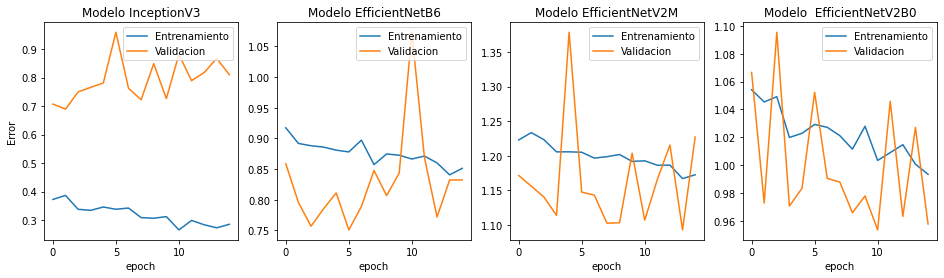

In [ ]:
title = ["InceptionV3", "EfficientNetB6", "EfficientNetV2M"," EfficientNetV2B0"]


fig, ax = plt.subplots(1, 4, figsize=(16,4),)


for i in range(4):
    ax[i].plot(range(e),  historia_tl[i].history['loss'])
    ax[i].plot(range(e),  historia_tl[i].history['val_loss'])
    ax[i].legend(['Entrenamiento', 'Validacion'], loc='upper right')
    ax[i].set_title("Modelo "+str(title[i]))
    ax[i].set_xlabel("epoch")
  
ax[0].set_ylabel('Error')
plt.show()

Los gráficos muestran la variación de los valores de error para entrenamiento y validación de los 4 modelos pre-entrenados.
Se puede observar que el desempeño de estas redes fue peor que el de las preguntas anteriores. Además se observa una gran diferencia entre los valores de entrenamiento y validación, lo cual puede indicar un overfitting.

### Preguntas: 

1. ¿Qué es Transfer Learning?
2. ¿Cómo se implementa Transfer Learning con un modelo pre entrenado? (explique brevemente)

**Respuestas:**

1. Consiste en un conjunto de métodos que permite transferir conocimientos adquiridos en la resolución de otros problemas. Esto lo realizamos a través de la utilización de modelos pre-entrenados para resolver nuestros problemas.

2. Para implementar se debe cargar el modelo pre entrenado y modificarlo de acuerdo al problema que se quiere resolver, por ejemplo, agregar capas para hacer calzar el input en caso de ser necesario o agregar capas de salida para adecuar a la cantidad de clases. Por último, se entrenan las distintas capas agregadas, con la opción de no volver a entrenar las capas intermedias.